In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_probs = pd.read_csv(r'../outputs/outputs_SVM_GFK/output_GKF_canonizer_novel_scale.csv')

In [3]:
df_probs.rename(columns={"Unnamed: 0": "index"}, inplace=True)
df_probs.set_index("index", inplace = True)

In [4]:
def raccourcis(df):
    df_res = df.copy()
    shorter_index, list_date = [], []
    for elem in df_res.index:
        index, date = shorted_str(elem)
        shorter_index.append(index)
        list_date.append(date)
    df_res.index = shorter_index
    df_res['date'] = list_date
    return df_res

In [5]:
def shorted_str(string):
    date = int(string[:4])
    shorter_str = string[:4]
    conteur = 0
    for i in range(1, len(string)):
        if string[i]=='_':
            conteur+=1
        
        if (string[i-1] == '_' or string[i-1] == '-') and conteur < 3:
            if string[i-1] == '_':
                shorter_str+=string[i-1]
            shorter_str+=string[i].upper()
            
    return shorter_str, date

In [6]:
def get_df_with_dates(df):
    df_res = df.copy()
    list_date = []
    for elem in df_res.index:
        list_date.append(int(elem.split('_')[0]))
    df_res['date'] = list_date

    return df_res

In [7]:
df_probs_dated = get_df_with_dates(df_probs)

In [8]:
sns.set_palette('bright')
sns.set_context("talk")
sns.set_style("darkgrid")

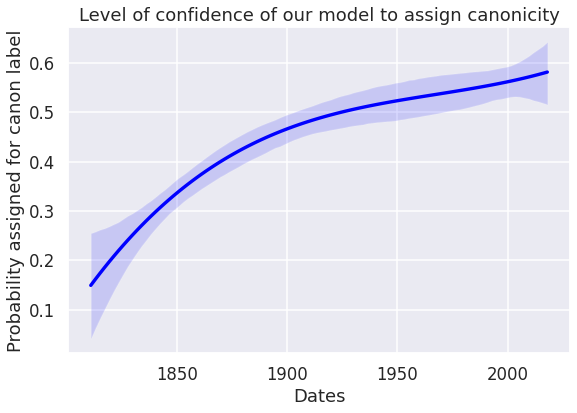

In [9]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.set_title('Level of confidence of our model to assign canonicity')

ax = sns.regplot(data=df_probs_dated, 
                 x='date', 
                 y='proba_canon', 
                 color='blue', 
                 order=3, 
                 scatter=False, 
                 ax=ax)

ax.set_xlabel('Dates')
ax.set_ylabel('Probability assigned for canon label')

plt.show()

In [10]:
hue_order = ['canon', 'non_canon']

In [11]:
#df_probs_dated["index"] = df_probs_dated.index
#selected = ["1906_Zevaco-Michel_Borgia-.txt", "1869_Flaubert-Gustave_L-Education-sentimentale.txt"]

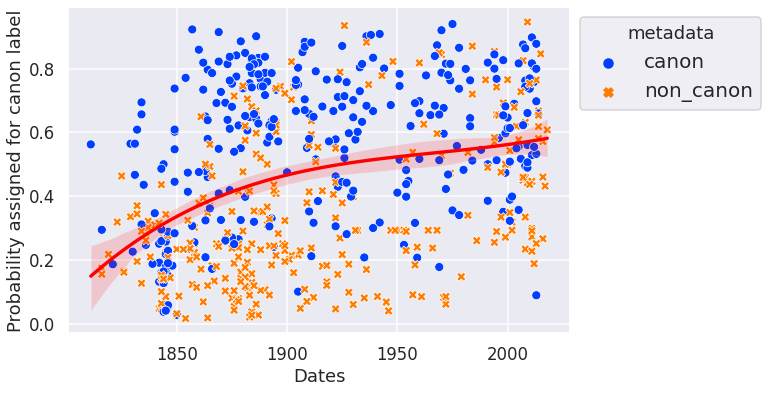

In [13]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
#ax.set_title('Level of confidence of our model to assign canonicity, novel scale')


ax = sns.scatterplot(data=df_probs_dated, 
                     x='date', 
                     y='proba_canon', 
                     hue='metadata', 
                     hue_order=hue_order,
                     style="metadata",
                     style_order=hue_order,
                     ax=ax)


ax = sns.regplot(data=df_probs_dated, 
                 x='date', 
                 y='proba_canon', 
                 color='red', 
                 order=3, 
                 scatter=False, 
                 ax=ax)

#for line in range(0, df_probs_dated.shape[0]):
#    if df_probs_dated["index"][line] in selected:
#        plt.text(df_probs_dated.date[line]+0.02, df_probs_dated.proba_canon[line], df_probs_dated["index"][line], horizontalalignment='left', size='small', color='black', weight='semibold')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize = 20)

ax.set_xlabel('Dates')
ax.set_ylabel('Probability assigned for canon label')

plt.savefig('../img/MAIN_viz_novel_scale_anotated.png', format='png', bbox_inches='tight', dpi=400)

plt.show()

### SELECT PREDS == CANON

In [27]:
results_canon = df_probs_shorter[df_probs_shorter['prediction']=='canon']

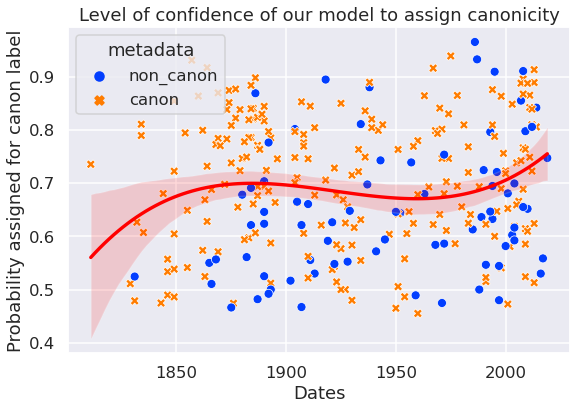

In [28]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.set_title('Level of confidence of our model to assign canonicity')


ax = sns.scatterplot(data=results_canon, 
                     x='date', 
                     y='proba_canon', 
                     hue='metadata', 
                     style="metadata",
                     ax=ax)


ax = sns.regplot(data=results_canon, 
                 x='date', 
                 y='proba_canon', 
                 color='red', 
                 order=3, 
                 scatter=False, 
                 ax=ax)

ax.set_xlabel('Dates')
ax.set_ylabel('Probability assigned for canon label')

plt.show()

In [29]:
results_noncanon = df_probs_shorter[df_probs_shorter['prediction']=='non_canon']

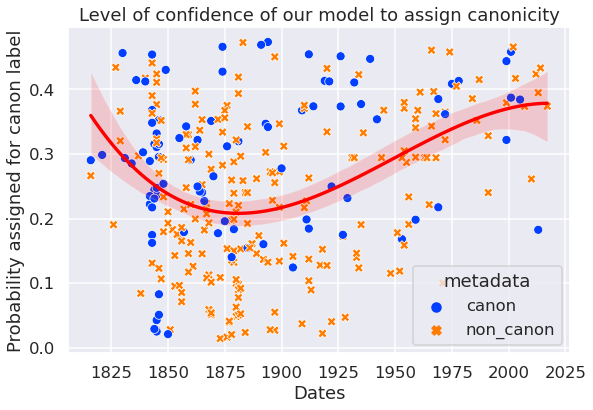

In [30]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.set_title('Level of confidence of our model to assign canonicity')


ax = sns.scatterplot(data=results_noncanon, 
                     x='date', 
                     y='proba_canon', 
                     hue='metadata', 
                     style="metadata",
                     ax=ax)


ax = sns.regplot(data=results_noncanon, 
                 x='date', 
                 y='proba_canon', 
                 color='red', 
                 order=3, 
                 scatter=False, 
                 ax=ax)

ax.set_xlabel('Dates')
ax.set_ylabel('Probability assigned for canon label')

plt.show()

### SELECT GT == CANON

In [31]:
results_gt_canon = df_probs_shorter[df_probs_shorter['metadata']=='canon']

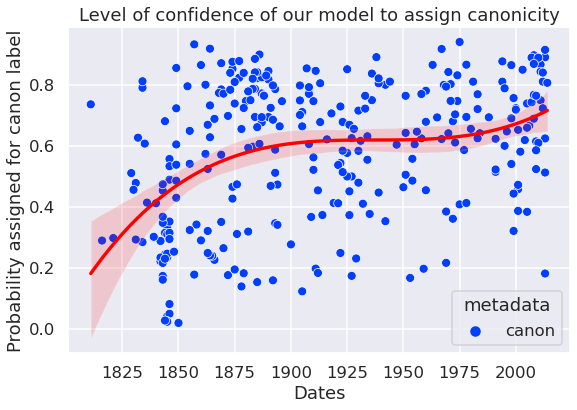

In [32]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.set_title('Level of confidence of our model to assign canonicity')


ax = sns.scatterplot(data=results_gt_canon, 
                     x='date', 
                     y='proba_canon', 
                     hue='metadata', 
                     style="metadata",
                     ax=ax)


ax = sns.regplot(data=results_gt_canon, 
                 x='date', 
                 y='proba_canon', 
                 color='red', 
                 order=3, 
                 scatter=False, 
                 ax=ax)

ax.set_xlabel('Dates')
ax.set_ylabel('Probability assigned for canon label')

plt.show()

In [33]:
results_gt_noncanon = df_probs_shorter[df_probs_shorter['metadata']=='non_canon']

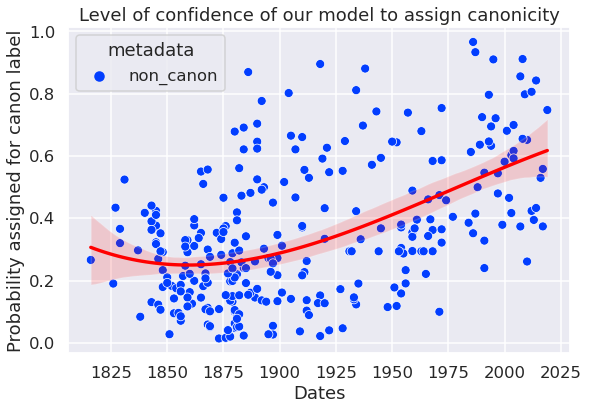

In [34]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.set_title('Level of confidence of our model to assign canonicity')


ax = sns.scatterplot(data=results_gt_noncanon, 
                     x='date', 
                     y='proba_canon', 
                     hue='metadata', 
                     style="metadata",
                     ax=ax)


ax = sns.regplot(data=results_gt_noncanon, 
                 x='date', 
                 y='proba_canon', 
                 color='red', 
                 order=3, 
                 scatter=False, 
                 ax=ax)

ax.set_xlabel('Dates')
ax.set_ylabel('Probability assigned for canon label')

plt.show()

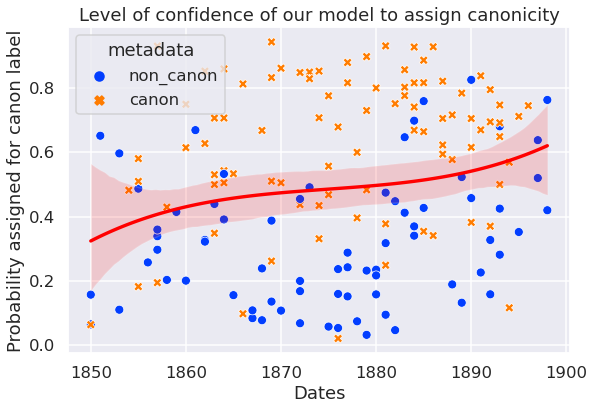

In [11]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.set_title('Level of confidence of our model to assign canonicity')


ax = sns.scatterplot(data=df_probs_shorter, 
                     x='date', 
                     y='proba_canon', 
                     hue='metadata', 
                     style="metadata",
                     ax=ax)


ax = sns.regplot(data=df_probs_shorter, 
                 x='date', 
                 y='proba_canon', 
                 color='red', 
                 order=3, 
                 scatter=False, 
                 ax=ax)


ax.set_xlabel('Dates')
ax.set_ylabel('Probability assigned for canon label')

plt.show()

In [19]:
from scipy import stats

In [20]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

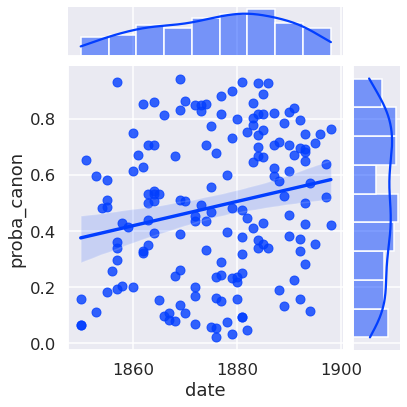

In [22]:
sns.jointplot(data=df_probs_shorter, 
                     x='date', 
                     y='proba_canon', 
                     kind="reg")#, 
                     #stat_func=r2)

In [26]:
import scipy as sp

In [28]:
r, p = sp.stats.pearsonr(df_probs_shorter['date'], df_probs_shorter['proba_canon'])

In [29]:
r, p

(0.20764427537757593, 0.007446331965720047)

In [24]:
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['date'], data['proba_canon'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
   

AttributeError: 'AxesSubplot' object has no attribute 'map_dataframe'

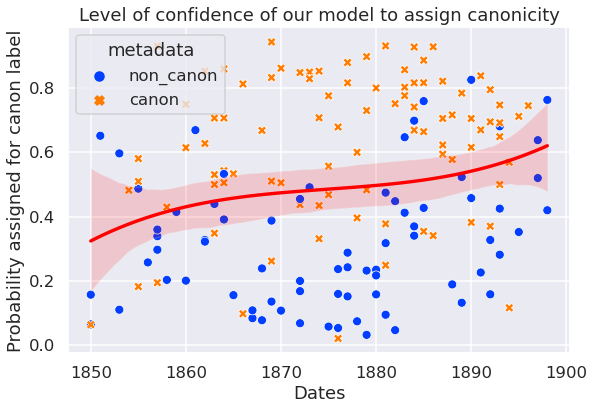

In [25]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.set_title('Level of confidence of our model to assign canonicity')


ax = sns.scatterplot(data=df_probs_shorter, 
                     x='date', 
                     y='proba_canon', 
                     hue='metadata', 
                     style="metadata",
                     ax=ax)


ax = sns.regplot(data=df_probs_shorter, 
                 x='date', 
                 y='proba_canon', 
                 color='red', 
                 order=3, 
                 scatter=False, 
                 ax=ax)


ax.set_xlabel('Dates')
ax.set_ylabel('Probability assigned for canon label')

 
ax.map_dataframe(annotate)

plt.show()